# Task 1

I would like to use machine learning to determine the liklihood that a person's income is greater than \\$50k, based on a variety of factors like age, education level, marital status, occupation, relationship, race, and gender, capital gain, capital loss, hours worked per week, and native country. Logistic regression would be best to solve this problem as it is a binary classification problem: a person can only have a salary greater than or less than or equal to \\$50k.

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
# data source: https://www.kaggle.com/datasets/mastmustu/income
df = pd.read_csv('train.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
df.shape

(43957, 15)

In [5]:
df.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,41459,43957,43957,41451,43957,43957,43957,43194
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,30587,14197,20147,5519,17749,37572,29400,39429


In [9]:
df['income_>50K'].value_counts(normalize=True)

0    0.760721
1    0.239279
Name: income_>50K, dtype: float64

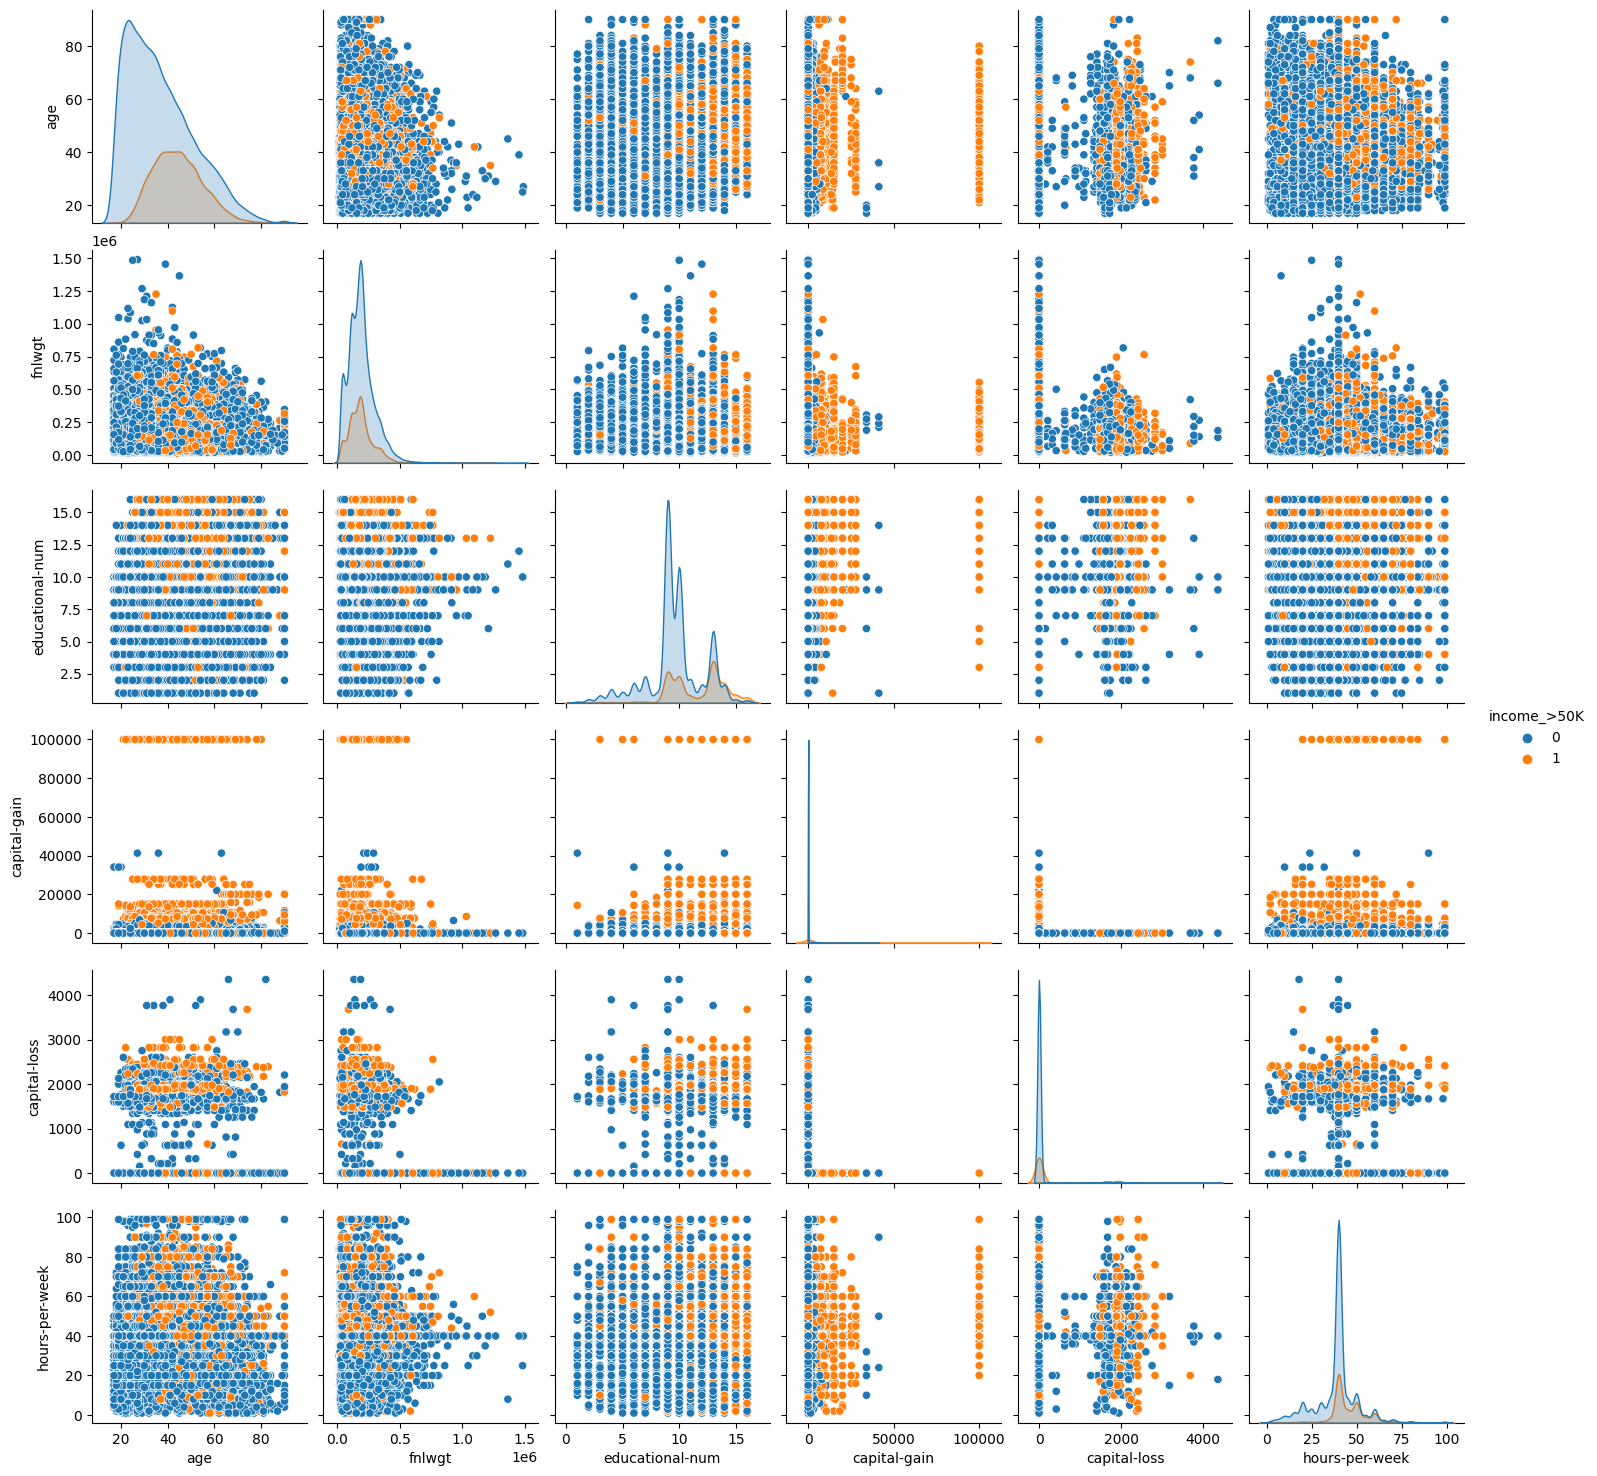

In [10]:
sns.pairplot(df,hue='income_>50K')
plt.show()

In [11]:
# which columns have a missing value?
df.isnull().any(axis=0) #axis 0 is rows so those are compressed

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income_>50K        False
dtype: bool

In [12]:
# how many rows have a missing value?
df.isnull().any(axis=1).sum()

3230

In [13]:
df.isna().sum()/df.shape[0]

age                0.000000
workclass          0.056828
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.057010
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.017358
income_>50K        0.000000
dtype: float64

# Workclass

My initial thought was to look at the education level and utilize that to estimate what type of job the person may hold. For instance, if the person only has a highschool level education, I would assume they do not work for the federal government. However, after looking over the data there does not seem to be a strong correlation between education and workclass. There was little to no correlation between workclass and any other single variable that I could find. So, to minimize bias, I replaced the undefined values with each type of workclass in proportion to that workclass' precent frequency (not counting nan values). This way, no workclass is over or under-represented and each is proportionally effected by my alteration, thus limiting any bias I may introduce. I also replaced undefined values in the order they appear in the chart and started replacement with the largest workclass, Private, to the smallest in order to not introduce any further bias.

In [14]:
df.groupby('workclass', dropna=False).mean()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
workclass,,,,,,,
Federal-gov,42.570093,183527.609813,10.951713,961.700156,111.411994,41.539720,0.394860
Local-gov,41.828136,189970.312190,11.065556,824.145996,107.159107,40.892275,0.300496
Never-worked,20.375000,229942.375000,7.250000,0.000000,0.000000,34.375000,0.000000
Private,36.853108,192664.351849,9.867558,902.337235,81.045085,40.246150,0.217118
Self-emp-inc,45.774704,178486.916996,11.150198,5405.509223,161.874177,48.608696,0.561924
Self-emp-not-inc,45.394342,176073.842090,10.230081,1773.986432,112.188510,44.335739,0.276559
State-gov,39.592825,182124.136105,11.389522,770.045558,83.509681,39.052392,0.269362
Without-pay,46.050000,170247.600000,8.950000,341.500000,94.350000,32.900000,0.100000
NaN,40.123299,186856.944756,9.255404,480.213771,68.772218,31.857886,0.094476


In [15]:
df.groupby('workclass', dropna=False).describe(include=["O"])

education                             marital-status         \
                     count unique           top   freq          count unique   
workclass                                                                      
Federal-gov           1284     15       HS-grad    354           1284      7   
Local-gov             2822     16       HS-grad    680           2822      6   
Never-worked             8      5          10th      2              8      4   
Private              30587     16       HS-grad  10522          30587      7   
Self-emp-inc          1518     15     Bachelors    390           1518      6   
Self-emp-not-inc      3464     16       HS-grad   1156           3464      7   
State-gov             1756     16  Some-college    431           1756      7   
Without-pay             20      4       HS-grad     13             20      4   
NaN                   2498     16  Some-college    758           2498      7   

                                            occupation         ...   race  \
                                 top   freq      count unique  ...    top   
workclass                                                      ...          
Federal-gov       Married-civ-spouse    651       1284     13  ...  White   
Local-gov         Married-civ-spouse   1385       2822     12  ...  White   
Never-worked           Never-married      5          0      0  ...  White   
Private           Married-civ-spouse  13059      30587     13  ...  White   
Self-emp-inc      Married-civ-spouse   1137       1518     12  ...  White   
Self-emp-not-inc  Married-civ-spouse   2293       3464     12  ...  White   
State-gov         Married-civ-spouse    791       1756     12  ...  White   
Without-pay       Married-civ-spouse     12         20      9  ...  White   
NaN                    Never-married   1107          0      0  ...  White   

                        gender                     native-country         \
                   freq  count unique   top   freq          count unique   
workclass                                                                  
Federal-gov         953   1284      2  Male    871           1262     26   
Local-gov          2305   2822      2  Male   1683           2792     35   
Never-worked          5      8      2  Male      6              8      1   
Private           26168  30587      2  Male  20128          30057     41   
Self-emp-inc       1423   1518      2  Male   1336           1471     31   
Self-emp-not-inc   3202   3464      2  Male   2905           3404     38   
State-gov          1424   1756      2  Male   1081           1721     29   
Without-pay          18     20      2  Male     13             20      2   
NaN                2074   2498      2  Male   1377           2459     38   

                                        
                            top   freq  
workclass                               
Federal-gov       United-States   1189  
Local-gov         United-States   2650  
Never-worked      United-States      8  
Private           United-States  27181  
Self-emp-inc      United-States   1359  
Self-emp-not-inc  United-States   3146  
State-gov         United-States   1624  
Without-pay       United-States     19  
NaN               United-States   2253  

[9 rows x 28 columns]

In [16]:
df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum())

Private             0.737765
Self-emp-not-inc    0.083552
Local-gov           0.068067
State-gov           0.042355
Self-emp-inc        0.036614
Federal-gov         0.030970
Without-pay         0.000482
Never-worked        0.000193
Name: workclass, dtype: float64

In [17]:
numPrivate = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum())).Private * (df['workclass'].isna().sum()))
numSeni = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['Self-emp-not-inc'] * (df['workclass'].isna().sum()))
numLocal = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['Local-gov'] * (df['workclass'].isna().sum()))
numState = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['State-gov'] * (df['workclass'].isna().sum()))
numSei = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['Self-emp-inc'] * (df['workclass'].isna().sum()))
numFed = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['Federal-gov'] * (df['workclass'].isna().sum()))
numWithout = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['Without-pay'] * (df['workclass'].isna().sum()))
numNever = (df['workclass'].isna().sum()) - numPrivate - numSeni - numLocal - numState - numSei - numFed - numWithout

if numPrivate > 0:
    df['workclass'] = df['workclass'].fillna('Private', limit = numPrivate)

if numSeni > 0:
    df['workclass'] = df['workclass'].fillna('Self-emp-not-inc', limit = numSeni)

if numLocal > 0:
    df['workclass'] = df['workclass'].fillna('Local-gov', limit = numLocal)

if numState > 0:
    df['workclass'] = df['workclass'].fillna('State-gov', limit = numState)

if numSei > 0:
    df['workclass'] = df['workclass'].fillna('Self-emp-inc', limit = numSei)

if numFed > 0:
    df['workclass'] = df['workclass'].fillna('Federal-gov', limit = numFed)
    
if numWithout > 0:
    df['workclass'] = df['workclass'].fillna('Without-pay', limit = numWithout)

if numNever > 0:
    df['workclass'] = df['workclass'].fillna('Never-worked', limit = numNever)

In [18]:
df['workclass'].value_counts(dropna = False)

Private             32430
Self-emp-not-inc     3673
Local-gov            2992
State-gov            1862
Self-emp-inc         1609
Federal-gov          1361
Without-pay            21
Never-worked            9
Name: workclass, dtype: int64

In [19]:
df.isna().sum()/df.shape[0]

age                0.000000
workclass          0.000000
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.057010
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.017358
income_>50K        0.000000
dtype: float64

# Occupation
Similar to workclass, there was little correlation between occupation and any other single variable that I could find. So, to minimize bias, I replaced the undefined values with each type ofoccupation in proportion to that occupation's precent frequency (not counting nan values). This way, no occupation is over or under-represented and each is proportionally effected by my alteration, thus limiting any bias I may introduce. I also replaced undefined values in the order they appear in the chart and started replacement with the largest occupation, Craft-repair, to the smallest in order to not introduce any further bias.

In [20]:
df.groupby('occupation', dropna=False).mean()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
occupation,,,,,,,
Adm-clerical,37.166067,192470.715827,10.106115,494.315148,67.371103,37.724021,0.133493
Armed-Forces,31.000000,210486.384615,10.538462,561.384615,0.000000,44.307692,0.307692
Craft-repair,38.973908,192550.613155,9.093314,700.829317,78.208733,42.248052,0.228121
Exec-managerial,42.186161,185928.359426,11.455866,2296.193789,140.707228,44.980930,0.478206
Farming-fishing,41.255935,174477.316024,8.513353,722.637240,62.451039,46.494807,0.117211
Handlers-cleaners,32.595847,201387.437700,8.510117,292.164004,53.483493,37.832268,0.069755
Machine-op-inspct,37.751014,193167.741055,8.507193,317.348580,65.241608,40.768351,0.120989
Other-service,34.884442,187791.836556,8.781475,223.345324,43.681879,34.630845,0.040917
Priv-house-serv,43.622222,193655.791111,7.573333,179.120000,43.368889,33.057778,0.013333


In [21]:
df.groupby('occupation', dropna=False).describe(include=["O"])

workclass                           education         \
                      count unique          top  freq     count unique   
occupation                                                               
Adm-clerical           5004      7      Private  3761      5004     16   
Armed-Forces             13      1  Federal-gov    13        13      7   
Craft-repair           5519      7      Private  4281      5519     16   
Exec-managerial        5506      7      Private  3621      5506     16   
Farming-fishing        1348      7      Private   617      1348     16   
Handlers-cleaners      1878      7      Private  1751      1878     14   
Machine-op-inspct      2711      7      Private  2580      2711     16   
Other-service          4448      7      Private  3678      4448     16   
Priv-house-serv         225      1      Private   225       225     15   
Prof-specialty         5518      6      Private  3063      5518     16   
Protective-serv         874      6    Local-gov   404       874     15   
Sales                  4965      7      Private  3989      4965     16   
Tech-support           1321      6      Private  1057      1321     14   
Transport-moving       2121      7      Private  1697      2121     16   
NaN                    2506      8      Private  1843      2506     16   

                                      marital-status         ...   race        \
                            top  freq          count unique  ...    top  freq   
occupation                                                   ...                
Adm-clerical            HS-grad  1846           5004      7  ...  White  4079   
Armed-Forces            HS-grad     4             13      2  ...  White    11   
Craft-repair            HS-grad  2628           5519      7  ...  White  4967   
Exec-managerial       Bachelors  1848           5506      7  ...  White  4959   
Farming-fishing         HS-grad   517           1348      7  ...  White  1247   
Handlers-cleaners       HS-grad   853           1878      6  ...  White  1559   
Machine-op-inspct       HS-grad  1372           2711      7  ...  White  2178   
Other-service           HS-grad  1746           4448      7  ...  White  3440   
Priv-house-serv         HS-grad    83            225      6  ...  White   167   
Prof-specialty        Bachelors  1991           5518      7  ...  White  4829   
Protective-serv         HS-grad   290            874      7  ...  White   710   
Sales                   HS-grad  1425           4965      7  ...  White  4429   
Tech-support       Some-college   392           1321      6  ...  White  1124   
Transport-moving        HS-grad  1097           2121      7  ...  White  1794   
NaN                Some-college   759           2506      7  ...  White  2079   

                  gender                      native-country         \
                   count unique     top  freq          count unique   
occupation                                                            
Adm-clerical        5004      2  Female  3370           4944     39   
Armed-Forces          13      1    Male    13             12      1   
Craft-repair        5519      2    Male  5235           5433     39   
Exec-managerial     5506      2    Male  3933           5415     37   
Farming-fishing     1348      2    Male  1259           1338     21   
Handlers-cleaners   1878      2    Male  1646           1854     28   
Machine-op-inspct   2711      2    Male  1993           2663     38   
Other-service       4448      2  Female  2447           4348     40   
Priv-house-serv      225      2  Female   212            215     21   
Prof-specialty      5518      2    Male  3493           5380     37   
Protective-serv      874      2    Male   762            867     24   
Sales               4965      2    Male  3227           4877     38   
Tech-support        1321      2    Male   801           1296     29   
Transport-moving    2121      2    Male  2007           2085     32   
NaN                

In [22]:
df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum())

Craft-repair         0.133145
Prof-specialty       0.133121
Exec-managerial      0.132832
Adm-clerical         0.120721
Sales                0.119780
Other-service        0.107307
Machine-op-inspct    0.065403
Transport-moving     0.051169
Handlers-cleaners    0.045307
Farming-fishing      0.032520
Tech-support         0.031869
Protective-serv      0.021085
Priv-house-serv      0.005428
Armed-Forces         0.000314
Name: occupation, dtype: float64

In [23]:
df['occupation'].value_counts(dropna = False)

Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
NaN                  2506
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64

In [24]:
numAF = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Armed-Forces'] * (df['occupation'].isna().sum()))
numPHS = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Priv-house-serv'] * (df['occupation'].isna().sum()))
numCR = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Craft-repair'] * (df['occupation'].isna().sum()))
numProfS = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Prof-specialty'] * (df['occupation'].isna().sum()))
numEM = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Exec-managerial'] * (df['occupation'].isna().sum()))
numAC = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Adm-clerical'] * (df['occupation'].isna().sum()))
numSale = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Sales'] * (df['occupation'].isna().sum()))
numOS = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Other-service'] * (df['occupation'].isna().sum()))
numMOI = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Machine-op-inspct'] * (df['occupation'].isna().sum()))
numTM = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Transport-moving'] * (df['occupation'].isna().sum()))
numHC = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Handlers-cleaners'] * (df['occupation'].isna().sum()))
numFF = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Farming-fishing'] * (df['occupation'].isna().sum()))
numTS = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Tech-support'] * (df['occupation'].isna().sum()))
numProtS = (df['occupation'].isna().sum()) - numAF - numPHS - numCR - numProfS - numEM - numAC - numSale - numOS - numMOI - numTM - numHC - numFF - numTS

if numCR > 0:
    df['occupation'] = df['occupation'].fillna('Craft-repair', limit = numCR)

if numProfS > 0:
    df['occupation'] = df['occupation'].fillna('Prof-specialty', limit = numProfS)
    
if numEM > 0:
    df['occupation'] = df['occupation'].fillna('Exec-managerial', limit = numEM)
    
if numAC > 0:
    df['occupation'] = df['occupation'].fillna('Adm-clerical', limit = numAC)
    
if numSale > 0:
    df['occupation'] = df['occupation'].fillna('Sales', limit = numSale)
    
if numOS > 0:
    df['occupation'] = df['occupation'].fillna('Other-service', limit = numOS)
    
if numMOI > 0:
    df['occupation'] = df['occupation'].fillna('Machine-op-inspct', limit = numMOI)
    
if numTM > 0:
    df['occupation'] = df['occupation'].fillna('Transport-moving', limit = numTM)
    
if numHC > 0:
    df['occupation'] = df['occupation'].fillna('Handlers-cleaners', limit = numHC)
    
if numFF > 0:
    df['occupation'] = df['occupation'].fillna('Farming-fishing', limit = numFF)
    
if numTS > 0:
    df['occupation'] = df['occupation'].fillna('Tech-support', limit = numTS)
    
if numProtS > 0:
    df['occupation'] = df['occupation'].fillna('Protective-serv', limit = numProtS)
    
if numPHS > 0:
    df['occupation'] = df['occupation'].fillna('Priv-house-serv', limit = numPHS)
    
if numAF > 0:
    df['occupation'] = df['occupation'].fillna('Armed-forces', limit = numAF)


In [25]:
df['occupation'].value_counts(dropna = False)

Craft-repair         5853
Prof-specialty       5852
Exec-managerial      5839
Adm-clerical         5307
Sales                5265
Other-service        4717
Machine-op-inspct    2875
Transport-moving     2249
Handlers-cleaners    1992
Farming-fishing      1429
Tech-support         1401
Protective-serv       925
Priv-house-serv       239
Armed-Forces           13
Armed-forces            1
Name: occupation, dtype: int64

In [26]:
df.isna().sum()/df.shape[0]

age                0.000000
workclass          0.000000
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.000000
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.017358
income_>50K        0.000000
dtype: float64

# Native Country
There are a large number of surveyed countries, each with similar values in each column. Thus, deducing which country a participant is from using their data is challenging and likely not accurate. However, the vast majority, over 90%, of participants are from the United States. Considering individual countries could lead to too many features when performing one-hot-encoding, so I grouped native country into two categories: those in the US, represented by 0, and those outside of the US, represented by 1, roping NaN values into "non-US" as they are not specified as such.

In [27]:
df['native-country'].value_counts()/(df['native-country'].shape[0] - df['native-country'].isna().sum())

United-States                 0.912835
Mexico                        0.020373
Philippines                   0.006320
Germany                       0.004352
Puerto-Rico                   0.003866
Canada                        0.003658
El-Salvador                   0.003357
India                         0.003102
Cuba                          0.002871
China                         0.002616
England                       0.002523
South                         0.002431
Dominican-Republic            0.002246
Jamaica                       0.002246
Italy                         0.002176
Japan                         0.001922
Guatemala                     0.001829
Vietnam                       0.001783
Columbia                      0.001736
Poland                        0.001667
Haiti                         0.001644
Portugal                      0.001366
Taiwan                        0.001343
Iran                          0.001204
Nicaragua                     0.001065
Greece                   

In [28]:
df.loc[~df['native-country'].isin(['United-States']), 'native-country'] = 1
df.loc[df['native-country'].isin(['United-States']), 'native-country'] = 0

In [29]:
df['native-country'].value_counts(dropna = False)

0    39429
1     4528
Name: native-country, dtype: int64

In [30]:
df.isna().sum()/df.shape[0]

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income_>50K        0.0
dtype: float64

# Fnlwgt
Final weight was not explained by the provider of the data, nor how to calculate it. Thus, it is difficult to deduce the meaning of this variable so I will drop it from the data set.

In [31]:
df.drop('fnlwgt', axis=1, inplace=True)

# Education
The education column is variable and not very concrete. It correlates strongly with the educational number and seems redundant, so I dropped education in favor of using education number in its place.

In [32]:
df[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,education,educational-num
10,Doctorate,16.0
14,Prof-school,15.0
12,Masters,14.0
9,Bachelors,13.0
7,Assoc-acdm,12.0
8,Assoc-voc,11.0
15,Some-college,10.0
11,HS-grad,9.0
2,12th,8.0
1,11th,7.0


In [33]:
df.drop('education', axis=1, inplace=True)

# Capital Gain and Loss
Capital gain and loss are both correlated to an income >= 50k. However, they have very precise and variable values, making one-hot-encoding difficult. Most of the capital gain and loss values are 0, over 75%. So, to simplify the data I will group capital gain and loss into 0 and 1, which representes all values greater than 0.

In [34]:
df[['capital-loss', 'income_>50K']].groupby(['income_>50K'], as_index=False).mean().sort_values(by='capital-loss', ascending=False)

,income_>50K,capital-loss
1,1,193.028142
0,0,55.288167


In [35]:
df[['capital-gain', 'income_>50K']].groupby(['income_>50K'], as_index=False).mean().sort_values(by='capital-gain', ascending=False)

,income_>50K,capital-gain
1,1,4108.082810
0,0,145.362989


In [36]:
df['capital-gain'].describe()

count    43957.000000
mean      1093.559797
std       7570.536063
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [37]:
df['capital-loss'].describe()

count    43957.000000
mean        88.246491
std        404.588410
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [38]:
df['capital-gain'] = df['capital-gain'].astype(float)
df.loc[df['capital-gain'] > 0, 'capital-gain'] = 1

In [39]:
df['capital-loss'] = df['capital-loss'].astype(float)
df.loc[df['capital-loss'] > 0, 'capital-loss'] = 1

In [40]:
df[['income_>50K', 'capital-loss']].groupby(['capital-loss'], as_index=False).mean().sort_values(by='income_>50K', ascending=False)

,capital-loss,income_>50K
1,1.0,0.494935
0,0.0,0.226626


In [41]:
df[['income_>50K', 'capital-gain']].groupby(['capital-gain'], as_index=False).mean().sort_values(by='income_>50K', ascending=False)

,capital-gain,income_>50K
1,1.0,0.618417
0,0.0,0.205182


# Age
The values of age range from 17 to 90, so I divided them up into groups based on which decade they are in, where the 20 group will hold those with ages (10,20], the thirty group from (20,30], and so on.

In [42]:
df['age'].describe()

count    43957.000000
mean        38.617149
std         13.734401
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [43]:
df['age'] = df['age'].astype(float)
df.loc[df['age'] > 80, 'age'] = 90
df.loc[df['age'].between(71,80), 'age'] = 80
df.loc[df['age'].between(61,70), 'age'] = 70
df.loc[df['age'].between(51,60), 'age'] = 60
df.loc[df['age'].between(41,50), 'age'] = 50
df.loc[df['age'].between(31,40), 'age'] = 40
df.loc[df['age'].between(21,30), 'age'] = 30
df.loc[df['age'].between(11,20), 'age'] = 20

# Gender
Assign gender a number

In [44]:
df.gender = df.gender.map({ 'Male': 0, 'Female': 1 })

# Hours Per Week
Similar to age, break down into groups of 10, where the 10 group contains hours between (0, 10].

In [45]:
df['hours-per-week'].describe()

count    43957.000000
mean        40.407694
std         12.400303
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [46]:
df['hours-per-week'] = df['hours-per-week'].astype(float)
df.loc[df['hours-per-week'] > 90, 'hours-per-week'] = 100
df.loc[df['hours-per-week'].between(81,90), 'hours-per-week'] = 90
df.loc[df['hours-per-week'].between(71,80), 'hours-per-week'] = 80
df.loc[df['hours-per-week'].between(61,70), 'hours-per-week'] = 70
df.loc[df['hours-per-week'].between(51,60), 'hours-per-week'] = 60
df.loc[df['hours-per-week'].between(41,50), 'hours-per-week'] = 50
df.loc[df['hours-per-week'].between(31,40), 'hours-per-week'] = 40
df.loc[df['hours-per-week'].between(21,30), 'hours-per-week'] = 30
df.loc[df['hours-per-week'].between(11,20), 'hours-per-week'] = 20
df.loc[df['hours-per-week'].between(1,10), 'hours-per-week'] = 10

# One Hot Encoding of Non-Numerical Columns

In [47]:
# one hot encoding
for column in ['workclass', 'marital-status', 'occupation', 'relationship', 'race']:
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1).drop([column], axis=1)

In [48]:
df.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,Federal-gov,Local-gov,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,70.0,16,0,1.0,0.0,60.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,20.0,8,0,0.0,0.0,20.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,40.0,13,0,0.0,0.0,40.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60.0,4,0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,30.0,10,0,0.0,0.0,40.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


# Features Correlation

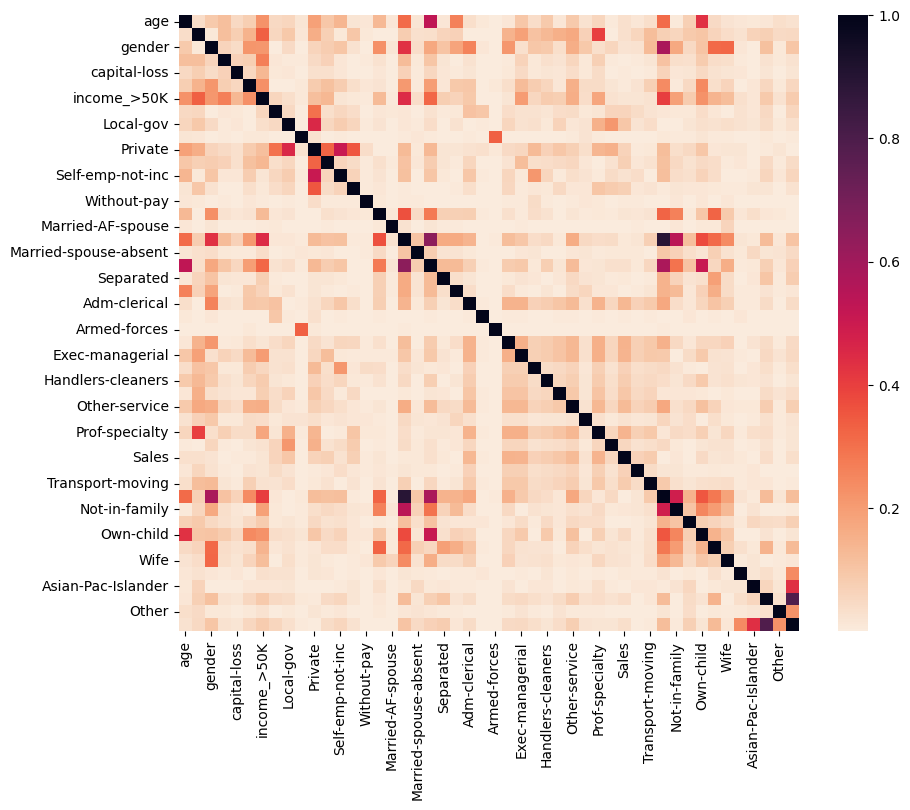

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')
plt.show()

In [50]:
# feature correlation with target variable
df.corr()['income_>50K'].sort_values(ascending=False)

income_>50K              1.000000
Married-civ-spouse       0.445642
Husband                  0.404058
educational-num          0.334035
capital-gain             0.266497
hours-per-week           0.227074
age                      0.225437
Exec-managerial          0.199347
Prof-specialty           0.177168
Self-emp-inc             0.136579
capital-loss             0.133311
Wife                     0.119661
White                    0.082444
Federal-gov              0.058594
Local-gov                0.031350
Protective-serv          0.024396
Self-emp-not-inc         0.018908
Tech-support             0.017536
Sales                    0.016782
Asian-Pac-Islander       0.011792
State-gov                0.010183
Married-AF-spouse        0.007195
Armed-Forces             0.002758
Armed-forces            -0.002675
Without-pay             -0.004941
Never-worked            -0.008026
Craft-repair            -0.016872
Transport-moving        -0.026171
Other                   -0.026306
Amer-Indian-Es

# Logistic Regression

In [51]:
#move income >= 50K to last column
df = df[['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'Federal-gov',
       'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Adm-clerical', 'Armed-Forces',
       'Armed-forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing',
       'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
       'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
       'Tech-support', 'Transport-moving', 'Husband', 'Not-in-family',
       'Other-relative', 'Own-child', 'Unmarried', 'Wife',
       'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White', 'income_>50K']]
# independent variables
X = df.iloc[:, :-1]

# dependent/target variable
y = df.iloc[:, -1]

X = np.c_[np.ones((X.shape[0], 1)), X]

y = y[:,np.newaxis]

theta = np.zeros((X.shape[1], 1))
theta = theta.astype(float)

In [52]:
#maps value between 1 and 0
def sigmoid(x):
    x = x.astype(float)
    return 1.0/(1+np.exp(-x))

In [53]:
#weighted sum of inputs
def net_input(theta,x):
    return np.dot(x,theta)

In [54]:
#probability after passing thru sigmoid
def probability(theta,x):
    return sigmoid(net_input(theta,x))

In [55]:
#computes cost function for all training samples
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1/m)*np.sum(y*np.log(probability(theta,x)) + (1-y) * np.log(1-probability(theta,x)))
    return total_cost

In [56]:
#computes gradient of cost function as point theta
def gradient(theta,x,y):
    m = x.shape[0]
    return (1/m) * np.dot(x.T, sigmoid(net_input(theta, x)) - y)

In [57]:
def batch_gd(nb_epochs, alpha, theta, x, y):
    cost = []
    
    costs = [cost_function(theta, x, y)]
    thetas = np.random.rand(x.shape[1])
    
    itr = 0
    
    for i in range(nb_epochs):
        grad = gradient(theta, x, y)
        
        theta = theta - alpha * grad
        cost = cost_function(theta, x, y)
        
        itr = itr + 1
        if(itr % 100 == 0):
            costs.append(cost)
            thetas = np.append(thetas, theta.copy())
        
    return np.array(thetas), np.array(costs)  

In [58]:
def gen_mini_batches(x, y, batch_size):
    mini_batches = []
    data = np.hstack((x, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [59]:
def mini(nb_epochs, alpha, theta, x, y, batch_size):
    theta = np.random.rand(x.shape[1],1)

    costs = [cost_function(theta, x, y)]
    thetas = np.random.rand(x.shape[1])
    
    itr = 0
    
    for itr in range(nb_epochs):
        mini_batches = gen_mini_batches(x, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            grad = gradient(theta, X_mini, y_mini)
        
            theta = theta - alpha * grad
            
            cost = cost_function(theta,X_mini, y_mini)
            
            itr = itr + 1
            if(itr % 500 == 0):
                costs.append(cost)
                thetas = np.append(thetas, theta.copy())
        
    return np.array(thetas), np.array(costs)

In [60]:
thetas, costs = batch_gd(1000, 0.0025, theta, X, y)
print(costs[-1])
thetas, costs = mini(100, 0.0005, theta, X, y, 50)
print(costs[-1])

0.5169356961639692
0.36930113515183377


In [61]:
def batch_gd_adagrad(nb_epochs, alpha, theta, x, y):
    cost = []
    
    costs = [cost_function(theta, x, y)]
    thetas = np.random.rand(x.shape[1])
    
    itr = 0
    
    lr = alpha
    
    lr_grad = np.zeros((x.shape[1], 1))
    lr_grad = lr_grad.astype(float)

    for i in range(nb_epochs):
        grad = gradient(theta, x, y)
        
        lr_grad = lr_grad + grad**2

        lr_grad = lr_grad.astype(float)

        lr = alpha/(np.sqrt(lr_grad + (10**(-8))))

        theta = theta - lr * grad

        cost = cost_function(theta, x, y)
        
        itr = itr + 1
        if(itr % 100 == 0):
            costs.append(cost)
            thetas = np.append(thetas, theta.copy())
        
    return np.array(thetas), np.array(costs)  

In [62]:
thetas, costs = batch_gd_adagrad(1000, 0.0025, theta, X, y)
print(costs[-1])

0.49438173481166536


In [63]:
def batch_gd_rmsprop(nb_epochs, alpha, theta, x, y, momentum):
    cost = []
    
    costs = [cost_function(theta, x, y)]
    thetas = np.random.rand(x.shape[1])
    
    itr = 0
    
    lr = alpha
    
    lr_grad = np.zeros((x.shape[1], 1))
    lr_grad = lr_grad.astype(float)
    
    last_grad = np.zeros((x.shape[1], 1))
    last_grad = lr_grad.astype(float) 

    for i in range(nb_epochs):
        grad = gradient(theta, x, y)

        lr_grad = (momentum * last_grad) + ((1-momentum) * grad**2)

        lr_grad = lr_grad.astype(float)

        lr = alpha/(np.sqrt(lr_grad + (10**(-8))))

        theta = theta - lr * grad

        cost = cost_function(theta, x, y)
        
        itr = itr + 1
        if(itr % 100 == 0):
            costs.append(cost)
            thetas = np.append(thetas, theta.copy())
        
        last_grad = lr_grad
        
    return np.array(thetas), np.array(costs)  

In [64]:
thetas, costs = batch_gd_rmsprop(1000, 0.0025, theta, X, y, 0.9)
print(costs[-1])

0.3395265054725874


# Conclusion
Mini-batch gradient descent performed much better than vanilla batch gradient descent. This is likely because mini-batch reduced the variance in parameter updates, leading to a more stable and accurate convergence. I also found that it ran somewhat faster than normal batch gradient descent.
Both optimization techniques improved the accuracy of the batch gradient descent. However, AdaGrad had only a slight effect, while RMSProp had a far greater impact. It was challenging to find a fitting learning rate for the batch gradient descent, so I thought AdaGrad would strongly improve gradient descent's accuracy. But, it increased the time to obtain results and afforded little benefit, possibly because the data used is not very sparse. So it would not be very useful to utilize AdaGrad for this data set. RMSProp, however, was more useful for this data. It likely reduces the diminishing rate of the alpha brought on by AdaGrad. So, it provides a more useful level of variance of learning rate and in doing so produces a more accurate model without significantly slowing the algorithm. For that reason, RMSProp seems to be advantageous in optimizing batch gradient descent for this set of data.